In [2]:
import matplotlib.pyplot as plt
import torch

$$
x\cdot\sigma(\beta x)
$$

- 跟 relu 一样，上无界，下有解；
- 跟 relu 不同，它是光滑的，且非单调的；

In [5]:
def swish(x, beta=1.):
    return x * torch.sigmoid(beta*x)    

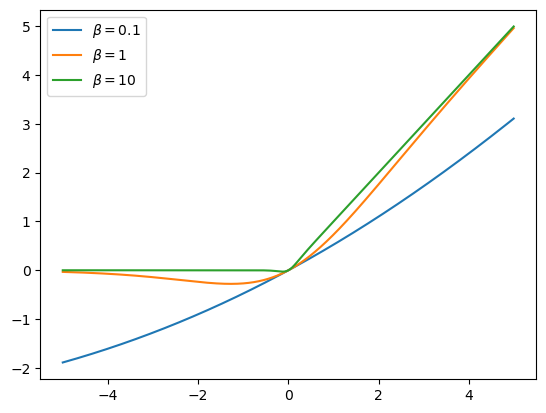

In [12]:
x = torch.arange(-5, 5, .01)
plt.plot(x.numpy(), swish(x, beta=0.1).numpy(), label=r'$\beta=0.1$')
plt.plot(x.numpy(), swish(x).numpy(), label=r'$\beta=1$')
plt.plot(x.numpy(), swish(x, beta=10).numpy(), label=r'$\beta=10$')
plt.legend()

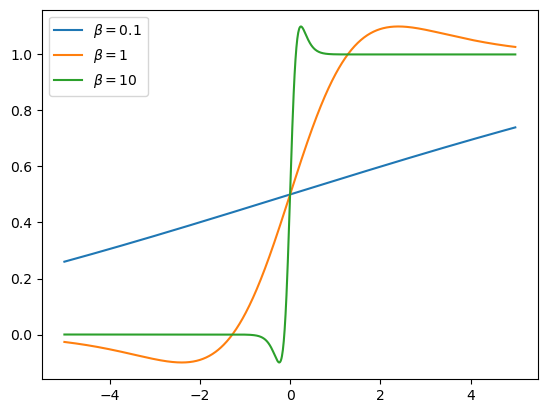

In [26]:
x = torch.arange(-5, 5, .01)
x.requires_grad = True
torch.sum(swish(x, beta=0.1)).backward()
plt.plot(x.detach().numpy(), x.grad.numpy(), label=r'$\beta=0.1$')

x = torch.arange(-5, 5, .01)
x.requires_grad = True
torch.sum(swish(x)).backward()
plt.plot(x.detach().numpy(), x.grad.numpy(), label=r'$\beta=1$')

x = torch.arange(-5, 5, .01)
x.requires_grad = True
torch.sum(swish(x, beta=10)).backward()
plt.plot(x.detach().numpy(), x.grad.numpy(), label=r'$\beta=10$')
plt.legend()